In [102]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import folium
from folium import plugins
plt.rcParams["figure.figsize"] = (12,12)

In [3]:
# Sanity check. Check that data files exist.
print(os.listdir())

['SF_Development_Pipeline_2020_Q4.xlsx', '1-CreateReviewFile.sql', 'data_fact.xlsx', '~$alysis of the San Francisco Housing Development Pipeline.docx', 'PipelineDataDictionary.xlsx', '.DS_Store', '~$SF_Development_Pipeline_2020_Q4.xlsx', 'dataManipuation.ipynb', 'contacts_dim.xlsx', 'SF_Development_Pipeline.png', 'sut2_final_project.ipynb', 'Screen Shot 2021-12-13 at 1.18.12 PM.png', 'ERDiagram.pbix', 'supervisors_dim.xlsx', 'SF_Development_Pipeline_2020_Q4.csv', 'cases_dim.xlsx', 'Analysis of the San Francisco Housing Development Pipeline.docx']


In [2]:
df = pd.read_excel("SF_Development_Pipeline_2020_Q4.xlsx")
df.head()

,LANDUSE,BLKLOT,NAMEADDR,Entitled,BESTSTAT,BESTDATE,UNITS,CFCTCO_Date,CFCTCO_Units,UNITSNET,...,PDA,SUD,LATITUDE,LONGITUDE,Location,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,Mixres,1609021F,700 36TH AV,True,CONSTRUCTION,2018-05-02,6.0,NaT,NaN,6.0,...,Richmond Corridors PDA,NaN,37.775540,-122.496011,POINT (-122.496011029 37.7755402862),8,8,8.0,4,29
1,Mixres,2515001,2800 SLOAT BL,True,CONSTRUCTION,2020-01-31,56.0,2020-09-23,48.0,56.0,...,Sunset Corridors PDA,NaN,37.735854,-122.504737,POINT (-122.504737332 37.7358537748),40,40,10.0,7,35
2,Resident,2630018,1169 STANYAN ST,True,CONSTRUCTION,2018-03-08,2.0,NaT,NaN,2.0,...,Central City Neighborhoods PDA,NaN,37.762873,-122.452553,POINT (-122.452553124 37.7628731227),110,110,7.0,11,14
3,Resident,5826003,106 BACHE ST,True,CONSTRUCTION,2019-07-09,2.0,NaT,NaN,2.0,...,NaN,Bernal Heights,37.733722,-122.417788,POINT (-122.417787983 37.73372245),61,61,9.0,2,2
4,Vacant,3733093,266 04TH ST,True,CONSTRUCTION,2019-02-20,NaN,NaT,NaN,NaN,...,Downtown/Van Ness/Northeast Neighborhoods PDA,Youth and Family Zone; Central SoMa,37.782079,-122.401661,POINT (-122.401661288 37.7820785716),32,32,1.0,10,34


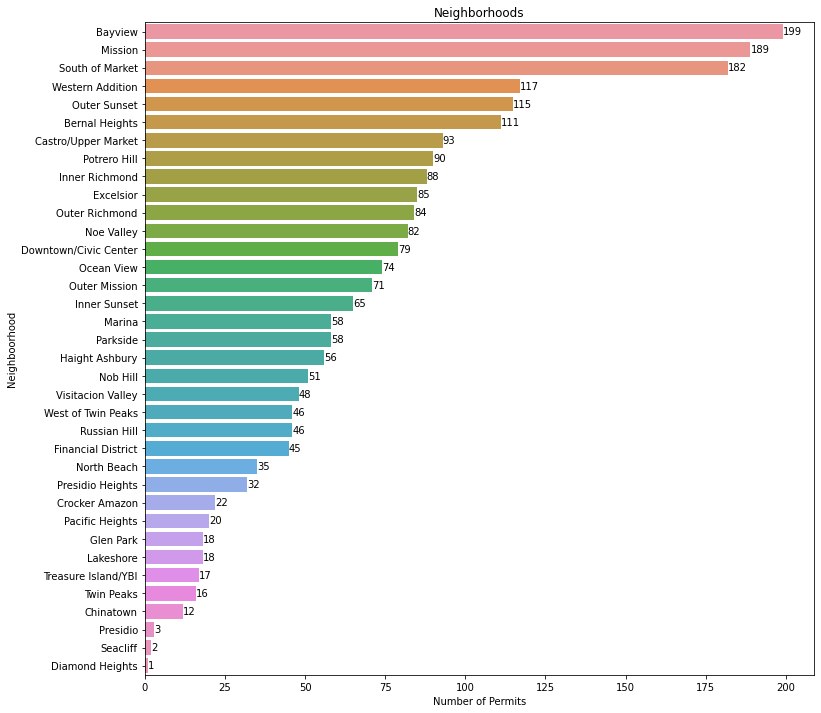

In [23]:
neighboorhood_chart = sns.countplot(data=df, y='NHOOD_37', order=df['NHOOD_37'].value_counts().index)
neighboorhood_chart.set_ylabel("Neighboorhood")
neighboorhood_chart.set_xlabel("Number of Permits")
neighboorhood_chart.set_title("Neighborhoods")
neighboorhood_chart.bar_label(neighboorhood_chart.containers[0])
plt.show(neighboorhood_chart)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


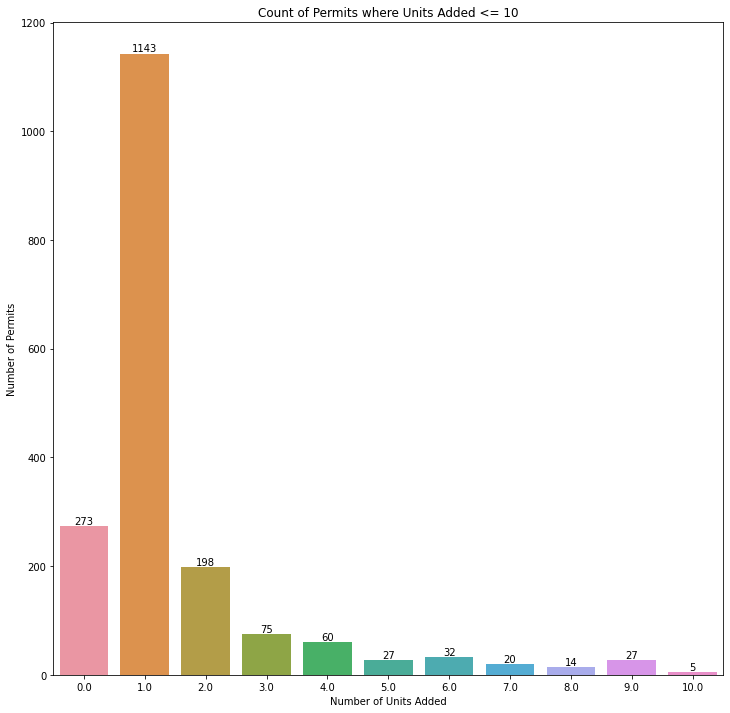

In [69]:
num_units_chart = sns.countplot(df["UNITSNET"][(df["UNITSNET"] <= 10) & (df["UNITSNET"] >= 0)])
num_units_chart.set_xlabel("Number of Units Added")
num_units_chart.set_ylabel("Number of Permits")
num_units_chart.set_title("Count of Permits where Units Added <= 10")
plt.bar_label(num_units_chart.containers[0])
plt.show(num_units_chart)

In [125]:
mean = np.mean(df["UNITSNET"].fillna(0))
print(f"Mean: {mean}")
median = np.median(df["UNITSNET"].fillna(0))
print(f"Median: {median}")
maximum = np.max(df["UNITSNET"].fillna(0))
print(f"Max: {maximum}")
minimum = np.min(df["UNITSNET"].fillna(0))
print(f"Min: {minimum}")

Mean: 31.105670103092784
Median: 1.0
Max: 9119.0
Min: -3.0


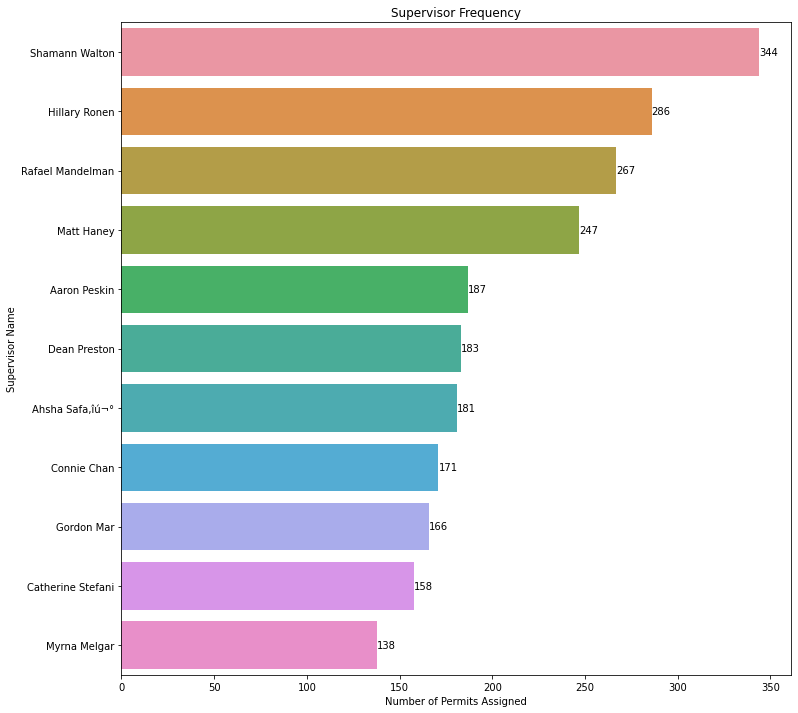

In [70]:
supervisor_chart = sns.countplot(data=df, y='SUPNAME', order=df['SUPNAME'].value_counts().index)
supervisor_chart.set_ylabel("Supervisor Name")
supervisor_chart.set_xlabel("Number of Permits Assigned")
supervisor_chart.set_title("Supervisor Frequency")
supervisor_chart.bar_label(supervisor_chart.containers[0])
plt.show(supervisor_chart)

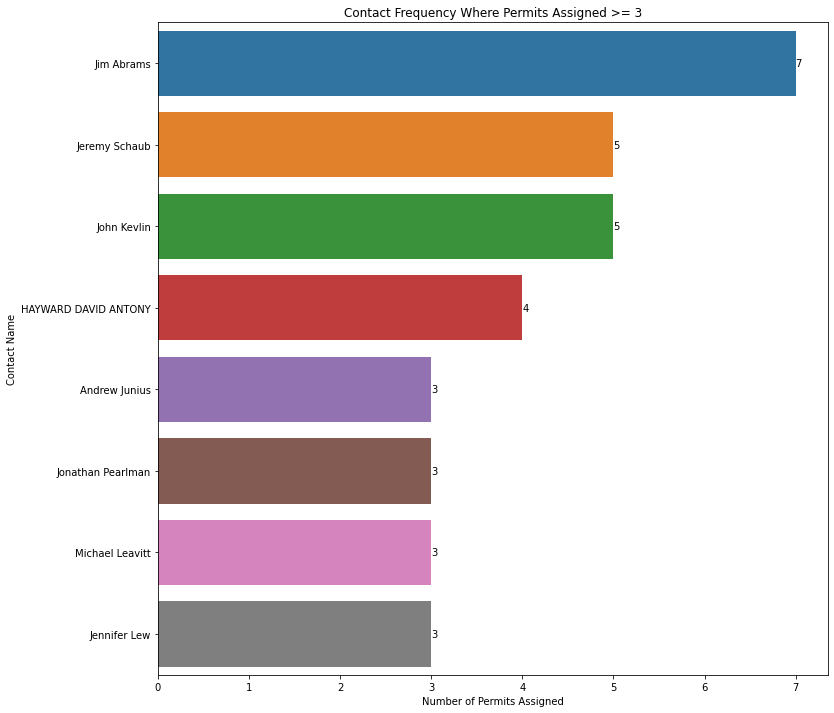

In [77]:
contacts_chart = sns.countplot(data=df, y='CONTACT', order=df['CONTACT'].value_counts()[:8].index)
contacts_chart.set_ylabel("Contact Name")
contacts_chart.set_xlabel("Number of Permits Assigned")
contacts_chart.set_title("Contact Frequency Where Permits Assigned >= 3")
contacts_chart.bar_label(contacts_chart.containers[0])
plt.show(contacts_chart)

In [116]:
# Create heatmap of permits in San Francisco
m = folium.Map(location=[37.77, -122.42], zoom_start=13)
locations = df[["LATITUDE", "LONGITUDE"]].to_numpy()
m.add_child(plugins.HeatMap(locations, radius=12))
m